# Explore dataset

In [2]:
words = open("names.txt", "r").read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [3]:
len(words)

32033

In [4]:
# Min length of a word
min(len(w) for w in words)

2

In [5]:
# Max length of a word
max(len(w) for w in words)

15

# Bigram

Working with only two characters at a time

Look at one given character and predict next character

In [9]:
"""
Slide two characters at a time through each word
"""
for w in words[:2]:
    print(w)
    for ch1, ch2 in zip(w, w[1:]):
        # NOTE: zip will stop if the shortest iterable is exhausted
        print(ch1, ch2)

emma
e m
m m
m a
olivia
o l
l i
i v
v i
i a


In [10]:
"""
Slide two characters at a time through each word
"""
for w in words[:1]:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        # NOTE: zip will stop if the shortest iterable is exhausted
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>


In [12]:
"""
Slide two characters at a time through each word
"""
b = {} # Count dictionary for bigrams
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        # NOTE: zip will stop if the shortest iterable is exhausted
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [14]:
sorted(b.items(), key = lambda kv: -kv[1]) # Reverse sort by count

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

## Use PyTorch for Bigram Counts

- Create a 2D array for bigram counts instead of keeping them in a dictionary
- Rows will represent first characters
- Columns will represent second characters

In [16]:
import torch

In [18]:
a = torch.zeros((3, 5))
a

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [19]:
a.dtype

torch.float32

In [21]:
# Let's convert dtype to int32 since we only deal with counts
a = torch.zeros((3, 5), dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [26]:
# NOTE: This is how to override brackets in Python

class Test:
    def __getitem__(self, val):
        print(val)
test = Test()
test[2, 3]

# ---

a[1, 3] = 1
a

(2, 3)


tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [27]:
a[1, 3] += 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

### Create + Visualize 2D array bigram counts

In [28]:
"""
Create 2D array for bigram counts
"""
numLowercaseAlphabets = 26
extra = 2 # start and end special characters
totalChars = numLowercaseAlphabets + extra
N = torch.zeros((totalChars, totalChars), dtype=torch.int32)

In [31]:
# Create index for each characters
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i, s in enumerate(chars)}
stoi["<S>"] = totalChars-2
stoi["<E>"] = totalChars-1

In [32]:
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [33]:
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        # NOTE: zip will stop if the shortest iterable is exhausted
        idx1, idx2 = stoi[ch1], stoi[ch2]
        N[idx1, idx2] += 1

In [42]:
# Reverse of stoi
# Given an integer, convert back to character
itos = {i:s for s, i in stoi.items()}

(-0.5, 27.5, 27.5, -0.5)

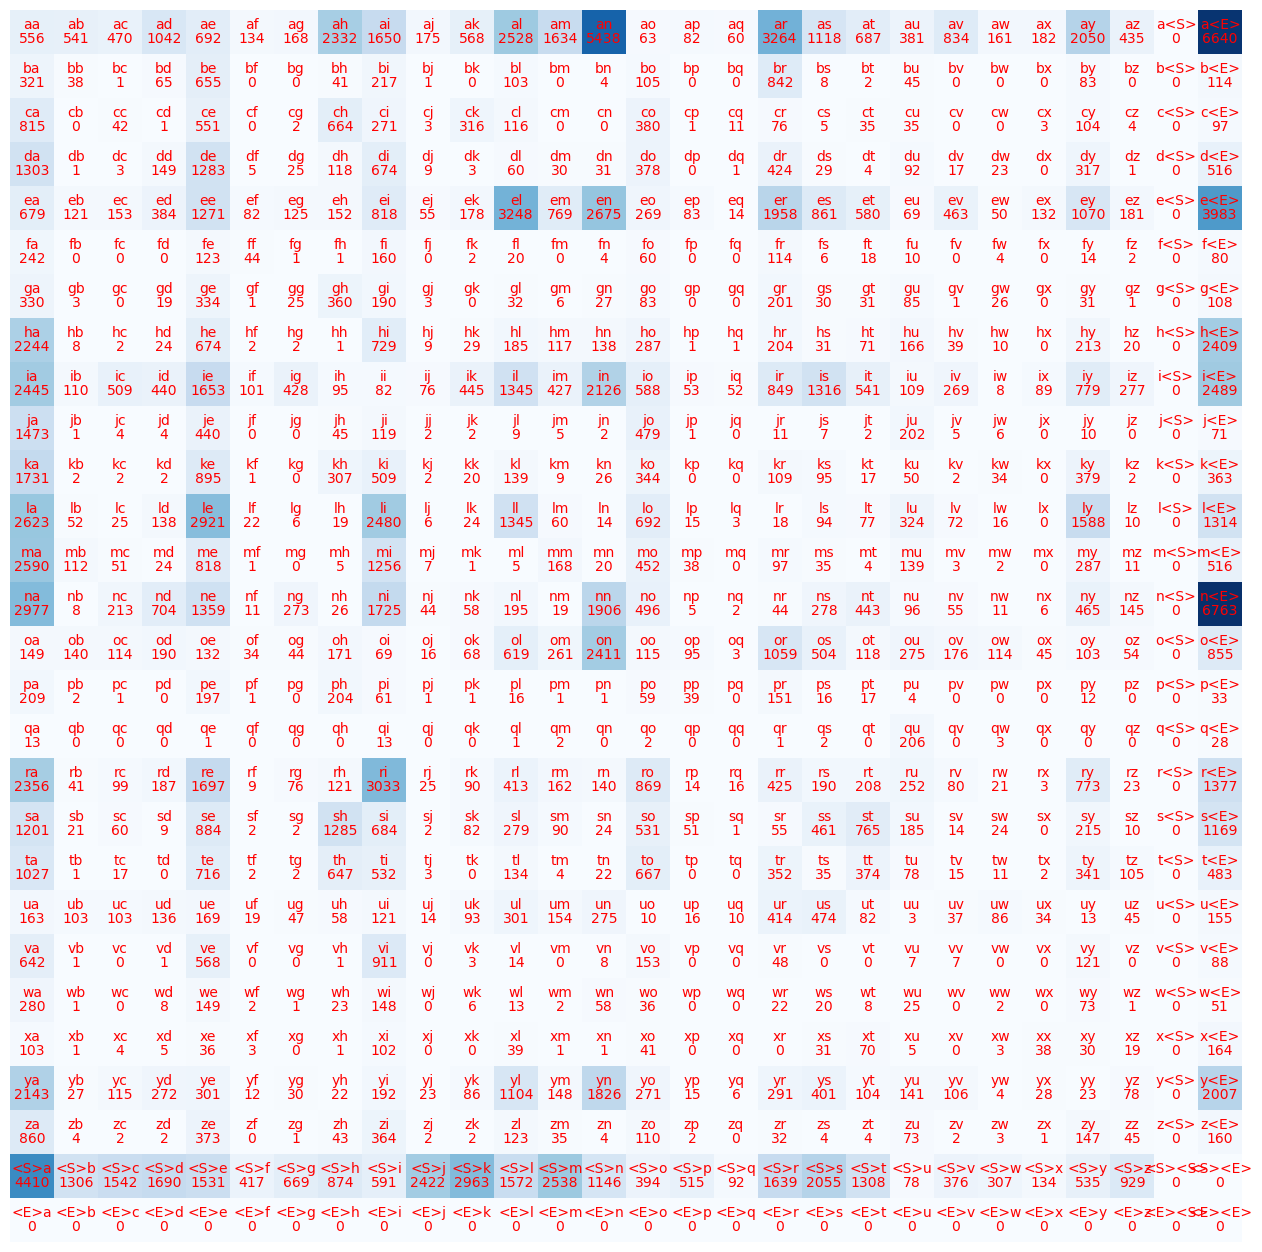

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap="Blues")

for i in range(totalChars):
    for j in range(totalChars):
        chstr = itos[i] + itos[j] # The bigram for that i, j combination
        plt.text(j, i, chstr, ha='center', va='bottom', color='red') # j, i here since x is column, y is row
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='red') # N[i, j] is still a Tensor type, so we use item() to get data value

plt.axis('off')

### Remove S and E tokens in favor of new . character

We observe that we have a whole column (second to last column) that ends with S having all 0 counts

We also have the whole row (last row) that starts with E having all 0 counts

So we will optimize that with only 1 single character

- Optimize space

- But sacrifice information like explicit boundaries

---

But for this problem, we view each word separately, not as the whole corpus

=> So using a single special character is fine

Imagine looking at 'a.': We know for sure that it's the end, since we are not reading a paragraph so '.' cannot be start in this case

---

**NOTES:** These are my own reasonings (Tu's), not explained in the video

In [49]:
numLowercaseAlphabets = 26
extra = 1 # now only '.' character
totalChars = numLowercaseAlphabets + extra
N = torch.zeros((totalChars, totalChars), dtype=torch.int32)

# We put '.' at index 0, so every other character is offset by 1
# Just for display and pretty
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s, i in stoi.items()}

In [50]:
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        # NOTE: zip will stop if the shortest iterable is exhausted
        idx1, idx2 = stoi[ch1], stoi[ch2]
        N[idx1, idx2] += 1

(-0.5, 26.5, 26.5, -0.5)

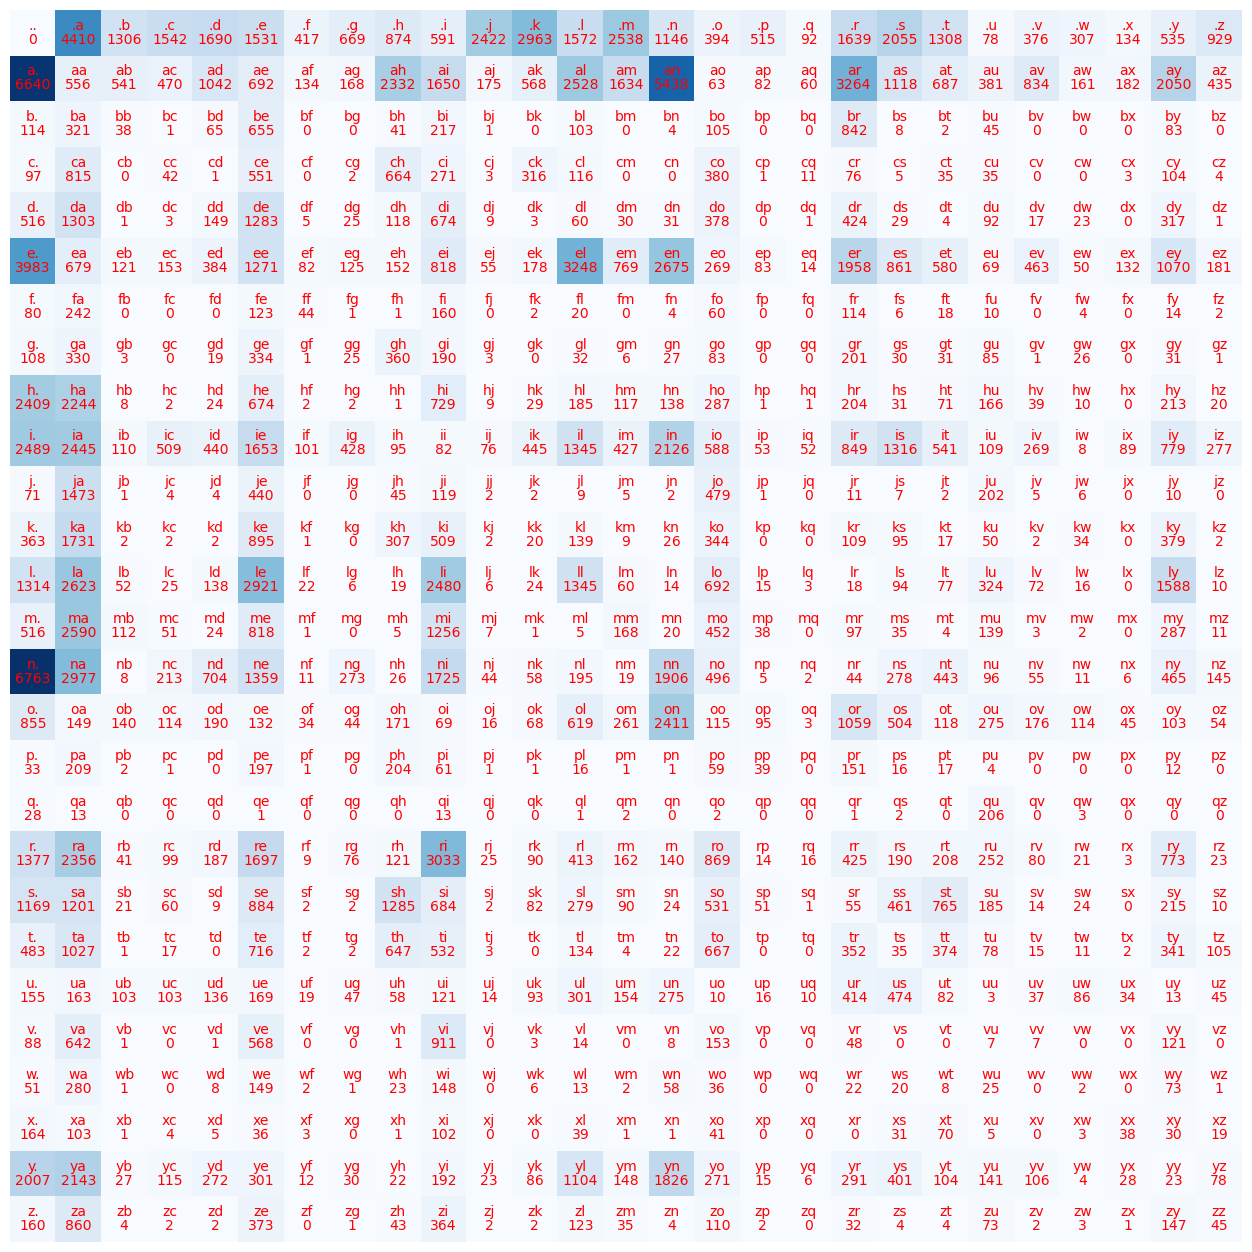

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap="Blues")

for i in range(totalChars):
    for j in range(totalChars):
        chstr = itos[i] + itos[j] # The bigram for that i, j combination
        plt.text(j, i, chstr, ha='center', va='bottom', color='red') # j, i here since x is column, y is row
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='red') # N[i, j] is still a Tensor type, so we use item() to get data value

plt.axis('off')

In [54]:
# Equivalent to N[0]
N[0, :]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

### Create probabilities + Sample from the distribution

In [58]:
p = N[0].float() # Convert to float
print(p)

p = p / p.sum()
print(p)

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])
tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])


In [68]:
"""
We will sample from the probability distribution above using PyTorch Multinomial
- Returns a tensor where each row contains num_samples indices sampled from the multinomial
- In other words, this will generate a sample of multiple indices of characters using our probability distribution

NOTE: To make the result deterministic (pseudo-random, same generated sequence across multiple runs), we will use PyTorch Generator
"""

# TEST
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
print(p)

# TEST
# Get samples from our distribution p
print(torch.multinomial(p, num_samples=20, replacement=True, generator=g))

tensor([0.7081, 0.3542, 0.1054])
tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])


In [73]:
# TEST
p = N[0].float()
p = p / p.sum()

g = torch.Generator().manual_seed(2147483647)
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([13, 19, 14,  1,  1, 20, 20,  1, 13, 13, 13, 11, 23, 13, 19, 18, 26, 11,
         7, 19])

In [78]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0 # Index of current character we are considering
    while True:
        p = N[ix].float()
        p = p / p.sum()

        # Draw a single sample from the distribution
        # This is interesting since we don't want to pick the most likely character all the time
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        
        # If drawn index 0, then we view it as the end of our generated word and break
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


In [106]:
"""
Create a probability matrix instead of computing same things multiple times
"""

P = N.float()

# TEST

# https://pytorch.org/docs/stable/generated/torch.sum.html
# Add all rows in each column -> Original matrix [27, 27] will result in a 2D matrix of size [1, 27]
test = P.sum(dim=0, keepdim=True)
print(test)
print(test.shape)
print()

# If not keep dim, then that dimension 0th will be squeezed out (removed) -> So we get a 1D vector of length 27
test = P.sum(dim=0, keepdim=False)
print(test)
print(test.shape)
print()

# Create probalitity matrix

P = N.float()

# This divison will create a new tensor, so that's not efficient
# P = P / P.sum(dim=1, keepdim=True) 

P /= P.sum(dim=1, keepdim=True) # We prefer in-place operation whenever possible

"""
Can we do division [27, 27] matrix by [27, 1]?
- The answer to that is broadcasting rule
- Read https://pytorch.org/docs/stable/notes/broadcasting.html

What it really does in this case is that it takes the dimension 1 and stretch it out (copy) to match 27
- So basically it copies the sum of each row and and clone it out to other 26 columns

I believe the mechanism of how this works is that it will start cloning from the trailing dimension first
- Clone the smaller dimension to match the larger dimension
- Keep cloning until all dimensions are the same
"""

# TEST
a1 = torch.zeros(1, 2, 1)
print(a1)
print()

a2 = torch.ones(2, 1, 2)
print(a2)
print()

a3 = a1 + a2 # a3 has size (2, 2, 2)
print(a3)
print()

tensor([[32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
         17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
         12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.]])
torch.Size([1, 27])

tensor([32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
        17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
        12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.])
torch.Size([27])

tensor([[[0.],
         [0.]]])

tensor([[[1., 1.]],

        [[1., 1.]]])

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])



In [108]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0 # Index of current character we are considering
    while True:
        p = P[ix]

        # Draw a single sample from the distribution
        # This is interesting since we don't want to pick the most likely character all the time
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        
        # If drawn index 0, then we view it as the end of our generated word and break
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
